#20210824 여기서 부터 소스 분석 수행

In [2]:
from tensorflow import keras # 텐션플로우로 부터 케라스를 입포트 합니다.
keras.__version__ # 텐션플로우 버전 확인

'2.6.0'

In [ ]:
#import tensorflow as tf
#tf.compat.v1.disable_v2_behavior()

In [3]:
from google.colab import drive # 코렙의 드라이브 임포트 수행
import os, shutil #??? 이건 코렙으로부터 임포트하는건가요? 그냥 임포트하는건가요? 이부분 아시는분?
                  #코렙으로 부터 os로 파일 읽거나, 폴더를 생성할때, 사용되는 os library 불러옴.

drive.mount('/content/drive/') # 해당 경로를 드라이브로 마운트 수행
os.chdir('/content/drive/My Drive/PART1_ai_project_20210824_0830') # 해당 경로로 이동합니다.
!pwd

Mounted at /content/drive/
/content/drive/My Drive/PART1_ai_project_20210824_0830


/content/drive/My Drive/PART1_ai_project_20210824_0830 로 이동해서 !pwd했을때 해당 폴더가 보입니다.

In [4]:
import numpy as np # 넘파이를 np라고 약자로 부릅니다.
import pandas as pd # 판다스는 pd 라고 약자로 부르게 됩니다.

import os #os 라이브러리 입포트 하고
for dirname, ddd, filenames in os.walk('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/01_NohHyeonSeok'): # 해당 경로 및 파일에 대해서 디렉토리이름, _ <== 이거 머죠?, 파일네임으로 보내주게 됩니다.
    for filename in filenames:
        print(f"dirname : {dirname, ddd, filenames} ")
        os.path.join(dirname, filename)

dirname : ('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/01_NohHyeonSeok', ['input'], ['0827_LeeEunJin_Shufflenet_v2_modify_Noh_Hyeon_Seok.ipynb', '01_NohHyeonSeok_mask_detection.ipynb']) 
dirname : ('/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/01_NohHyeonSeok', ['input'], ['0827_LeeEunJin_Shufflenet_v2_modify_Noh_Hyeon_Seok.ipynb', '01_NohHyeonSeok_mask_detection.ipynb']) 


/content/drive/My Drive/PART1_ai_project_20210824_0830/02_Projects/01_NohHyeonSeok', ['input'], ['01_NohHyeonSeok_mask_detection.ipynb']

['input'] 는 / 에 해당 합니다.

In [ ]:
#2021-08-25 14:33분 <== 여기서부터 소스 분석을 수행해야합니다. 
!pwd

In [5]:
# 아래 부분은 트레인, 벨리데이션, 테스트에 대한 이미지를 가져올 경로를 정해주는 것이죠
traindir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Train' 
validdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Validation'
testdir='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test'

In [ ]:
!pwd

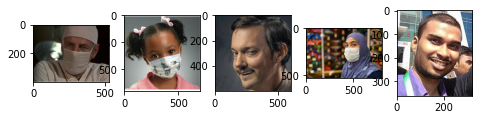

In [6]:
path='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/All' #전체 이미지가 들어있는 패스를 설정합니다.
#import cv2 # 이거 왜 임포트하죠? 티에서 쓰는게 없는거같은데? - 없어도 되네요?
import random # 값을 앤덤으로 생성하는 함수를 입포트합니다.
import matplotlib.pyplot as plt # matplotlib 라이브러리에 대해서  pyplot 패키지는 단순한 코드로 그래프를 생성할수 있음.
import matplotlib.image as mpimg # matplotlib 라이브러리에 대해서 image 패키지 이미지를 처리할수 있는 패키지

#plt.figure(figsize=(20,20)) 
cm = 1/2.54 # 센티미터 추가함.
plt.figure(figsize=(20*cm,20*cm)) # 20 센티미터로 하였음.

  # figure라는 그림단위, 이안에 한개 혹은 여러개의 plot을 관리하도록 함.
  # figure안에 들어가는 plot 하나를 subplot이라고 부릅니다.
  # 그림(figure)의 크기. (가로,세로) 인치 단위 20, 20
  # 의견 : 저그림이 해당범위내에서 보여줄수있는 최대비율의 사진인거같아요
 

for i in range(5): # 5개의 사진만 보여줄려고 한다.
    file=random.choice(os.listdir(path)) # 설정된 패스에서 1개 파일만 선택을 한다. 
    img_path=os.path.join(path,file) # 해당 파일이 있는 경로를 조인한다.
    image=mpimg.imread(img_path) # 해당 파일을 읽습니다.
    ax=plt.subplot(1,5,i+1) # figure 안에 5개의 subplot 중에 처음에는 0+1 해서 1번째꺼에 넣는다.
    plt.imshow(image) # 해당 이미지를 보여주게 됩니다.

In [ ]:
!pwd

#20210825 여기서 부터 소스 분석 수행

In [ ]:
##########################################################
#############          원 본                 #############
##########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 이미지에 대한 변환생성을 위해서 케라스의 ImageDataGenerator를 임포트 합니다.

#지금 부터는 해당 이미지의 사이즈를 동일하게 맞추는 작업 즉 train_data, test_data 전처리 작업을 수행하게 됩니다.

#[문의] train_data=ImageDataGenerator(rescale=1.0/255, zoom_range=0.2, shear_range=0.2) #어떤식으로 작용하는지는 모르겠습니다
# ImageDataGenerator
  #rescale=1.0/255 
     #rescale: 원본 영상은 0-255의 RGB 계수로 구성되는데, 이 같은 입력값은 모델을 효과적으로 학습시키기에 너무 높습니다 
     # (통상적인 learning rate를 사용할 경우). 그래서 이를 1/255로 스케일링하여 0-1 범위로 변환시켜줍니다. 
     # 이는 다른 전처리 과정에 앞서 가장 먼저 적용됩니다.
  #zoom_range=0.2 # 20% 확대
  #shear_range=0.2 
     # 블로그 예시에서는 45.0으로 보여주었는데 이는 오른쪽으로 45도 인거 같다고 생각이 됨(뇌피셜)
     # (https://ichi.pro/ko/keras-mich-tensorflowleul-sayonghan-imiji-deiteo-jeungdae-tamsaeg-184813206747204)
     #전단 변형은 이미지의 모양을 기울입니다. 이것은 전단 변환에서 하나의 축을 고정하고 전단 각도라는 특정 각도로 이미지를 늘린다는 점에서 회전과 다릅니다. 
     #이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다. shear_range경사 각도를도 단위로 지정합니다
     #shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)


# 위와 같이 수행하면
#train_data에 타입이 하나 만들어지게 됩니다.
# type(train_data) => keras.preprocessing.image.ImageDataGenerator

# ImageDataGenerator는 와플 기계이며 우리가 가지고 있는게 이미지에 해당 합니다.


# 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling 해준다.('WithMask' : 0 ,'WithoutMask' : 1) 이미지 사이즈는 64 * 64, 배치 사이즈는 32
train_generator = train_data.flow_from_directory(directory=traindir,target_size=(64,64),class_mode='binary',batch_size=32)

# flow_from_directory : 이미지 로드 및 이미지 증식을 할 수 있습니다
# directory=traindir <= 디렉토리 경로
# target_size=(64,64) <= 변환할 크기는 가로 64, 세로 64  단위는 픽셀
# class_mode='binary' <== 마스크 쓰고 안쓰고 2개의 바이너리 클래스로 나타낸다는거죠
# batch_size=32
   #batch_size는 한번 flow_from_directory가 실행 될 때 생성할 이미지 수입니다.
   #즉, 100개의 데이터가 있을때 batch_size가 1이면 flow_from_directory를 100번실행해야 가지고 있는 100개의 데이터를 불러낼수가 있습니다. 

# train_data 라는 ImageDataGenerator의 오브젝트에 메소드 중에서 flow_from_directory가 있는데
# flow_from_directory는 디렉토리에 있는걸 가져와서 train_data를 적용해서 반환해주는거죠
# 즉 100개가 있으면 100번 포문 돌아서 적용하는것처럼.


test_data=ImageDataGenerator(rescale=1.0/255) 

# valid generator 도 train generator와 마찬가지로 진행
valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(64,64),class_mode='binary',batch_size=32)

# test 데이터도 train generator 에서 진행한 방식과 동일하고 추가적으로 rescaling을 진행
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(64,64),class_mode='binary',batch_size=32,shuffle=False)

#shuffle=False 석지 않는다. 디폴트는 True
#test는 왜 석으면 안될까요?
 #shuffle=False를 True로 해주고 결과를 한번 확인해보시기 바랍니다. [실습]

print(valid_generator.class_indices)


In [ ]:
##########################################################
##########       데이터 증식 적용해봄         #########
##########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# 데이터 증식 수행 
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True) # 인풋을 무작위로 가로로 뒤집습니다.

train_generator = train_data.flow_from_directory(directory=traindir,target_size=(64,64),class_mode='binary',batch_size=32)

test_data=ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(64,64),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(64,64),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)


In [ ]:
##########################################################
##### 데이터 증식 + 사이즈 64 에서 256으로 변경 수행 #####
##########################################################

from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# 데이터 증식 수행 
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True) # 인풋을 무작위로 가로로 뒤집습니다.

train_generator = train_data.flow_from_directory(directory=traindir,target_size=(256,256),class_mode='binary',batch_size=32)

test_data=ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(256,256),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(256,256),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)


In [7]:
##################################################################################
##### NASnet Large 수행을 위해서 데이터 증식 + 사이즈 256 에서 331으로 변경 수행 #####
##################################################################################

from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# 데이터 증식 수행 
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True) # 인풋을 무작위로 가로로 뒤집습니다.

train_generator = train_data.flow_from_directory(directory=traindir,target_size=(331,331),class_mode='binary',batch_size=32)

test_data=ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(331,331),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(331,331),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)


Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [ ]:
##################################################################################
##### NASnet 모바일 수행을 위해서 데이터 증식 + 사이즈 256 에서 224으로 변경 수행 #####
##################################################################################

from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# 데이터 증식 수행 
train_data=ImageDataGenerator(rescale=1.0/255, 
                              zoom_range=0.2, # 20% 확대
                              shear_range=0.2, # 이것은 회전에서 보이지 않는 일종의 '늘이기'를 이미지에 만듭니다
                               rotation_range=40,  # 40도 회전
                              width_shift_range=0.2, # 0.2만큼 옆으로 shift
                              height_shift_range=0.2, # 0.1만큼 위로 shift
                              horizontal_flip=True) # 인풋을 무작위로 가로로 뒤집습니다.

train_generator = train_data.flow_from_directory(directory=traindir,target_size=(224,224),class_mode='binary',batch_size=32)

test_data=ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True )

valid_generator = test_data.flow_from_directory(directory=validdir,target_size=(224,224),class_mode='binary',batch_size=32)
test_generator = test_data.flow_from_directory(directory=testdir,target_size=(224,224),class_mode='binary',batch_size=32,shuffle=False)

print(valid_generator.class_indices)


In [ ]:
type(train_data)

In [ ]:
count=0
for filenames in train_generator.filenames:
    count = count+1
print(count)

In [ ]:
# 데이터 증식이란거는 우리가 기존 생각하고 있던 데이터의 수가 늘어나는 것이 아니라 여기서는 이미지의 형태를 다르게 해서 딥러닝할때 다양성을 늘리는것으로 보임.
# [민승준] 원본코드 kaggle쪽에서도 제가 건드려봤는데 Found값은 어떻게 제너레이트 하더라도 계속동일하네요

#20210826 여기서 부터 소스 분석 수행

In [ ]:
from tensorflow.keras import layers, Sequential
# layers는 기존에 수작업으로 하던 부분들에 대해서 레이어 부분을 클래스화 시킨 부분입니다.
# 케라스 코어에서 보면
# Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합합니다.

from keras.applications.vgg19 import VGG19 # VGG19 모델 적용
# VGG-19는 19개 계층으로 구성된 컨벌루션 신경망입니다

from keras.applications.vgg19 import preprocess_input # VGG19 모델에 데이터 입력받는 프로세서 임포트


vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(64,64,3))
  # VGG19 모델을 생성합니다.
  # weights: None으로 지정시 랜덤 초기화, 
             #'imagenet'로 지정시  (pre-training on ImageNet), 선행학습(pre-training) or 사전훈련(pre-training) or 전처리과정(pre-training)
             #이라고도 하는데, 이는 Multi Layered Perceptron (MLP)에서 Weight와 Bias를 잘 초기화 시키는 방법이다. 
             #이러한 Pre-training을 통해서 효과적으로 layer를 쌓아서 여러개의 hidden layer도 효율적으로 훈련 할 수 있다. 
  # include_top : 
    # include_top은 상단의 F.C 레이어를 포함할 것인이 아닌지 결정하는 파라미터이다.
    # 나는 classifier를 새로 만들었기 때문에 include_top을 False로 주었다.
  # input_shape : (64,64,3) 는 초기들어가는 이미지가 위에서 이미지 제러레이터를 했을때 64*64 픽셀로 만들었고 RGB이기 때문에 3으로 들어가야하는데
                  # 이부분은 조원들하고 상의를 해봐야겠다.<=================================================
                  # optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) 
                  #(with channels_last data format) or (3, 224, 224) (with channels_first data format). 
                  #It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

# vgg19.summary() ## 22개 레이어가 존재하고 끝에 FC(flatten_2 와 dense_2)가 없는 모델이다.

for layer in vgg19.layers: ## 22개 레이어를 꺼내서 
    layer.trainable = False ## 속성을 변경합니다. 훈련하지 않도록 
    #<== 이거 때문에 그러는건데요. 훈련한 모델을 그냥 갔다 쓰면 시간적인 낭비가 덜하기 때문에 다시 한번 훈련하지 않는거죠
    
vmodel = Sequential() # 모형 작성
   # Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합합니다.
vmodel.add(vgg19) # VGG19 기반 모델 추가
vmodel.add(layers.Flatten()) # 평평하게 만들어 Denser 레이어로 전환을 하기 위함.
vmodel.add(layers.Dense(1,activation='sigmoid')) # conv 후에 activation function 을 sigmoid 로 한다.
vmodel.summary() # shape와 param 가 왜 이렇게 나오는지 분석 필요함.

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')
# 컴파일 메소드를 통해 학습 방식에 대한 환경 설정
# 1. optimizer="adam" : optimzier로 adam을 채택 < = adam : 값을 예측할 경우 사용
# 2. loss='binary_crossentropy' : 모델 최적화에 사욜될 목적 함수
   # [Binary Crossentropy]
   # Binary classification 즉 클래스가 두 개인 이진 분류 문제에서 사용
   # label이 0 또는 1을 값으로 가질 때 사용
   # 모델의 마지막 레이어의 활성화 함수는 시그모이드 함수
# 3. metrics = 'accurarcy' :  정확도를 척도로 설정


In [ ]:
from tensorflow.keras import layers, Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input


vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(256,256,3))

for layer in vgg19.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(vgg19)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
# NASNetLarge 모델 생성
# When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (331, 331, 3).
# 이미지 사이즈를 331로 변경해야함.

from tensorflow.keras import layers, Sequential
from keras.applications.nasnet import NASNetLarge

NASNetLarge = NASNetLarge(weights='imagenet',include_top=False,input_shape=(331,331,3))

for layer in NASNetLarge.layers:
    layer.trainable = False
    
vmodel = Sequential()
vmodel.add(NASNetLarge)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [15]:
# NASNetLarge 모델 생성
# 런닝메이트 변경 수행 LR=0.0001

from tensorflow.keras import layers, Sequential
from keras.applications.nasnet import NASNetLarge
import tensorflow as tf

NASNetLarge = NASNetLarge(weights='imagenet',include_top=False,input_shape=(331,331,3))

for layer in NASNetLarge.layers:
    layer.trainable = False

NASNetLarge.summary()

vmodel = Sequential()
vmodel.add(NASNetLarge)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_780 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [ ]:
# NASNetMobile 모델 생성
# When setting `include_top=True` and loading `imagenet` weights, `input_shape` should be (224, 224, 3).
# 이미지 사이즈를 224로 변경해야함.

from tensorflow.keras import layers, Sequential
from keras.applications.nasnet import NASNetMobile

NASNetMobile = NASNetMobile(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in NASNetMobile.layers:
    layer.trainable = False

vmodel = Sequential()
vmodel.add(NASNetMobile)
vmodel.add(layers.Flatten())
vmodel.add(layers.Dense(1,activation='sigmoid'))
vmodel.summary()

vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')

In [ ]:
##################################################################################
########################### 런닝 메이트 변경 시 ##################################
##################################################################################
# 기존 : vmodel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')
# 변경 : vmodel.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

In [ ]:
#기존
#history = vmodel.fit(train_generator,steps_per_epoch=len(train_generator)//8,epochs=20,validation_data=valid_generator)
#신규
#감독 학습을 수행할 때 fit()를 사용할 수 있으며

history = vmodel.fit(train_generator
                     ,steps_per_epoch=len(train_generator)//8 
                                      # steps_per_epoch은 한 번 epoch 돌 때 데이터를 몇 번 볼 것인가를 정해준다. 
                                      #[트레이닝데이터수/배치사이즈]를 사용하면 되는듯하다.
                     ,epochs=20 # 에포크는 하나의 데이터셋을 몇 번 반복 학습할지 정하는 파라미터
                     ,validation_data=valid_generator # 검증데이터로는 데이터 증식할때 만들어낸 valid_generator를 사용하겠다.
                     , batch_size=128)
                       #배치사이즈는 몇 개의 관측치에 대한 예측을 하고, 레이블 값과 비교를 하는지를 설정하는 파라미터입니다. 
                       # 위의 예시에서 배치사이즈가 100이면 전체 데이터에 대해 모두 예측한 뒤 실제 레이블 값과 비교한 후 가중치 갱신을 합니다.
                       # 배치사이즈가 100인 경우, 어떤 한 유형에 대한 예측이 틀리면 이후 비슷한 유형에 대한 예측도 틀릴 수 있습니다. 
                       # 하지만 배치사이즈가 10인 경우에는, 데이터 10개마다 실제 레이블 값과 비교하기 때문에, 처음에 틀리게 예측하더라도 가중치 업데이트를 하면서 뒤에는 맞추게 될 확률이 높습니다.
                       # 배치사이즈가 클수록 많은 데이터를 저장해두어야 하므로 용량이 커야합니다. 반면, 배치사이즈가 작으면 학습은 촘촘하게 되겠지만 계속 레이블과 비교하고, 
                       # 가중치를 업데이트하는 과정을 거치면서 시간이 오래 걸립니다.

                      #100문제 다 풀고 해답을 맞히는 것과 1문제씩 풀고 해답을 맞히는 것은 어떤 차이가 있을까요? 
                      #언뜻 생각해서는 별 반 차이가 없어 보입니다. 하지만 모의고사 1회분에 비슷한 문항이 있다고 가정했을 때, 
                      #배치 사이즈가 100일 때는 다 풀어보고 해답을 맞춰보기 때문에 한 문제를 틀릴 경우 이후 유사 문제를 모두 틀릴 경우가 많습니다. 
                      # 배치사이즈가 1인 경우에는 한 문제씩 풀어보고 해답을 맞춰보기 때문에 유사문제 중 첫 문제를 틀렸다고 하더라도 해답을 보면서 학습하게 되므로 나머지 문제는 맞추게 됩니다. 
                      # 자 그럼 이 배치사이즈가 어떨 때 학습 효과가 좋을까요? 사람이 학습하는 것이랑 비슷하빈다. 100문항 다 풀고 해답과 맞추어보려면 문제가 무엇이었는지 다 기억을 해야 맞춰보면서 학습이 되겠죠 ? 
                      #기억력(용량)이 커야 합니다. 1문항씩 풀고 해답 맞추면 학습은 꼼꼼히 잘 되겠지만 시간이 너무 걸리겠죠 ? 그리고 해답지를 보다가 다음 문제의 답을 봐버리는 불상사가 생기겠죠.
                      #배치 사이즈가 작을수록 가중치 갱신이 자주 일어납니다

                      # 배치 사이즈는 나중에 튜닝이 필요할거같아요 크게도 해보고 작게도 해보고 그 중간도 해보다가 좋은 결과가 나올 때 그걸로 픽하는걸
                      # 강사님 대답 : 배치사이즈도 튜닝요소가 될 수 있지만 너무 작지만 않으면 튜닝에 그다지 문제되지 않습니다.
                                      # 메모리양에 따라 크면 클수록 종다고 설명드렸습니다.
 

# 데이터를 몇 번 볼 것인가를 정해준다. [트레이닝데이터수/배치사이즈]를 사용하면 되는듯하다. validation_steps는 한 번 epoch 돌 고난 후, 
# validation set을 통해 validation accuracy를 측정할 때 validation set을 몇 번 볼 것인지를 정해준다. 이 때도 마찬가지로 [validation data수/배치사이즈]를 사용하면 된다. 
#즉 ImageDataGenerator를 쓴 경우, fit_generator를 사용하면 된다고 기억하면 된다. 폴더 구조는 아래와 같이 하면 된다. 
#flow_from_directory에 넣어준 경로(dataset/training_set) 밑에 이런식으로 class(cats, dogs) 별로 폴더를 만들고 폴더 밑에 이미지들을 넣어준다. 그러면 알아서 labeling을 하게 된다.



In [ ]:
train_generator.image_shape

In [ ]:
len(train_generator)

In [ ]:
# 배치 사이즈에 맞게 다시 조정
#train_generator = train_data.flow_from_directory(directory=traindir,target_size=(256,256),class_mode='binary',batch_size=32)
 # 위에서 제너레이터로 만들때 배치사이즈가 32, 트레인 이미지가 600인데 이렇게 수행하면 600/32 = 18.75가 나옴
 # len(train_generator) = 19 가 나옴
 # 두개가 관련이 있는것으로 보이는데. 그림으로는 연결이 안되네요;;; 이거 이해하시는분?

history = vmodel.fit(train_generator
                     ,steps_per_epoch=len(train_generator)//19
                     ,epochs=20
                      ,validation_data=valid_generator
                      ,batch_size=128)

# 배치사이즈를 128로 했는데 메모리를 그닥 많이 안쓰는거 같은데요; 
# 강사님께서는 배치 사이즈를 높이면 메모리가 많이 쓴다고 하였는데

In [11]:
# 배치 사이즈에 맞게 다시 조정
history = vmodel.fit(train_generator
                     ,steps_per_epoch=len(train_generator)//8
                     ,epochs=20
                      ,validation_data=valid_generator
                      ,batch_size=128)

Epoch 1/20
2/2 [==============================] - 160s 101s/step - loss: 0.6037 - accuracy: 0.7031 - val_loss: 0.1368 - val_accuracy: 0.9575
Epoch 2/20
2/2 [==============================] - 37s 28s/step - loss: 0.1519 - accuracy: 0.9688 - val_loss: 0.0598 - val_accuracy: 0.9837
Epoch 3/20
2/2 [==============================] - 39s 28s/step - loss: 0.1000 - accuracy: 0.9844 - val_loss: 0.0830 - val_accuracy: 0.9706
Epoch 4/20
2/2 [==============================] - 35s 27s/step - loss: 0.0794 - accuracy: 0.9844 - val_loss: 0.0430 - val_accuracy: 0.9837
Epoch 5/20
2/2 [==============================] - 32s 26s/step - loss: 0.0309 - accuracy: 0.9844 - val_loss: 0.0849 - val_accuracy: 0.9771
Epoch 6/20
2/2 [==============================] - 32s 25s/step - loss: 0.1029 - accuracy: 0.9688 - val_loss: 0.0989 - val_accuracy: 0.9804
Epoch 7/20
2/2 [==============================] - 33s 26s/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.0555 - val_accuracy: 0.9804
Epoch 8/20
2/2 [=========

#steps_per_epoch에 따른 결과가 매우 차이가 많이남.
len(train_generator)//8 = val_accuracy: 0.9346
len(train_generator)//19 = val_accuracy: 0.7288


#20210827 여기서 부터 소프 분석 수행

In [ ]:
# history라는 파일이 위쪽에 선언된게 없음
 # - 히스토리 기능은 케라스의 모든 모델에 탑재되어 있으므로 별도의 설정없이 fit 함수의 반환으로 쉽게 얻을 수 있습니다.
history.history.keys()


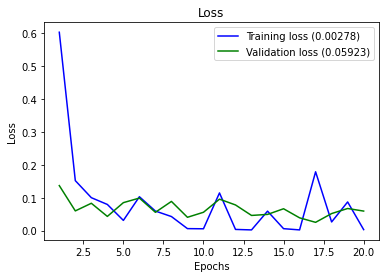

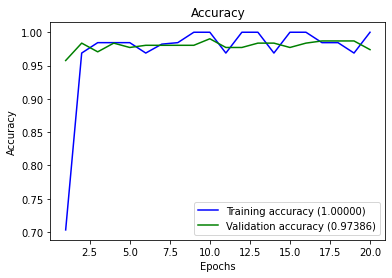

In [12]:
# history라는 파일이 위쪽에 선언된게 없음
 # - 히스토리 기능은 케라스의 모든 모델에 탑재되어 있으므로 별도의 설정없이 fit 함수의 반환으로 쉽게 얻을 수 있습니다.


def plot_history(history):  # 그림그리기
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]  #loss 랑 val값들이랑 분류작업 밑에도 똑같은 작용일듯
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:  # loss값이 없다면
        print('Loss is missing in history') # 잘못됬다는걸 보여주는거겠죠?
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1) # epoch 횟수..
    
    ## Loss
    plt.figure(1) #도화지
    for l in loss_list: #순서대로 표기
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history)

Mask detected


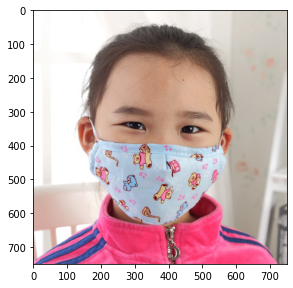

In [13]:
from PIL import Image
import tensorflow as tf

img='/content/drive/My Drive/PART1_ai_project_20210824_0830/01_Images/Test/WithMask/2083.jpg'
plt.figure(figsize=(10,10))
image=Image.open(img)
ax=plt.subplot(1,2,1)
plt.imshow(image)
image=np.resize(image,(1,331,331,3))
image = image.astype('float32')
image /= 255  

if vmodel.predict(image)[0][0]<0.5:
    print("Mask detected")
else:
    print("No mask detected")

In [ ]:
#저희가 캐글에서 본 소스는
#Found 10000 images belonging to 2 classes.
#Found 800 images belonging to 2 classes.
#Found 992 images belonging to 2 classes.

predictions=vmodel.predict(test_generator) #test_generator를 적용 해서 멀 구하는거죠?;;; 0과 1을 구하는건 아닌거 같은데 아시는분? 
# 아래와 같은 결과가 나오네용 : 정확도를 0 ~ 1사이의 값으로 표현하는거 같은데요 맞을까요?
#array([[0.0000000e+00],
#       [0.0000000e+00],
#       [0.0000000e+00],

# model.predict(x,y) x에 임의값 넣고, y는 batch_size를 넣습니다.

predictions=np.round(predictions) # round는 반올림하는 함수인거죠? 정수로 반환하는?
#predictions.shape = ((100, 1))

# np.zeros(483) # 483개의 1차원 배열을 만드는거네요
#np.ones(992-483) # 508개 만들어지네요? 992-483 = 509
y=np.hstack((np.zeros(483),np.ones(992-483))) # 992개 (483 + 509)

# y 개수하고 위에 캐글 test 이미지 개수하고 Found 992 images belonging to 2 classes. 하고 같네요. .

# numpy.ones 함수는 주어진 형태와 타입을 갖는 1로 채워진 어레이를 반환합니다.

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y,predictions)
m.result()

In [14]:
#저희꺼에 맞춰서 만든다면
#Test 데이터가 100개 입니다.
# - Found 100 images belonging to 2 classes

predictions=vmodel.predict(test_generator) 
predictions=np.round(predictions)
#predictions.shape = ((100, 1)) <== 그래서 여기서 100개가 나오게 됩니다.

#그럼 비교 하는 배열을 임의적으로 만들어줘야 하는데요
#원본소스에서는 개발하시는 분이 마스크 안쓴거 483개, 쓴거 509개로 알고 계시기 때문에
#y=np.hstack((np.zeros(483),np.ones(992-483))) # 992개 (483 + 509) <= 이렇게 만드신거라고 합니다.

# 그럼 저희는 50개는 마스크 쓴거, 50개 안쓰거니까요
# 아래와 같이 만들어주시면 됩니다.
y=np.hstack((np.zeros(50),np.ones(50)))

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y,predictions)
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.98>

In [ ]:
# numpy=0.96의 결과가 나오게 되지요